#  AI vs Real Image Classifier - Notebook

## Introduction
This notebook demonstrates:
- The problem of distinguishing AI-generated images from real photos.
- How we leverage our Roboflow-trained model (Vision Transformer).
- How to run inference on new samples using Roboflow’s API.
- Visualization of predictions alongside input images.

The trained model is hosted on Roboflow and accessed via API calls, which makes testing and deployment simple.

In [24]:
from inference_sdk import InferenceHTTPClient
import requests, json
from PIL import Image
import matplotlib.pyplot as plt

## Setup

We connect to the Roboflow `InferenceHTTPClient` using our workspace, workflow, and API key. 
This allows our Jupyter Notebook to send images to the hosted model and receive predictions.

In [25]:
client = InferenceHTTPClient(
    api_url="https://serverless.roboflow.com",
    api_key="Your Key"
)

workspace = "ziad-f3ycp"
workflow_id = "custom-workflow"

## Run Inference

We can now send a test image to the model.

In [26]:
# Path to a test image (replace with an image on your machine)
img_path = r"Your Image"

# Run the workflow
result = client.run_workflow(
    workspace_name=workspace,
    workflow_id=workflow_id,
    images={"image": img_path},
    use_cache=True
)

# Print raw JSON result
print(json.dumps(result, indent=2))

[
  {
    "predictions": {
      "inference_id": "2a8ee58d-7bfb-489d-9c4a-d2d0c8643ebc",
      "time": 0.005455982000057702,
      "image": {
        "width": 201,
        "height": 251
      },
      "predictions": [
        {
          "class": "Real",
          "class_id": 0,
          "confidence": 0.9805
        }
      ],
      "top": "Real",
      "confidence": 0.9805,
      "prediction_type": "classification",
      "parent_id": "image",
      "root_parent_id": "image"
    }
  }
]


## Visualizing the Prediction

Here we display:
- The test image
- The model’s predicted class (AI / Real)
- The confidence score

Prediction: Real, Confidence: 0.98


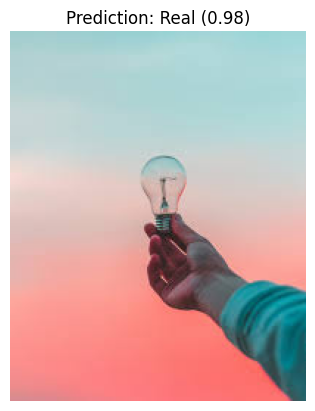

In [29]:
from PIL import Image
import matplotlib.pyplot as plt

# Extract prediction properly from your Roboflow JSON
pred_dict = result[0]["predictions"]["predictions"][0]

label = pred_dict["class"]               # class label ("Real" or "AI_Generated")
conf = pred_dict["confidence"]           # exact confidence score

# Alternatively (summary prediction at top level)
# label = result[0]["predictions"]["top"]
# conf = result[0]["predictions"]["confidence"]

print(f"Prediction: {label}, Confidence: {conf:.2f}")

# Visualize with matplotlib
img_path = r"Your Image"
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction: {label} ({conf:.2f})")
plt.show()

## Batch Predictions

We can also test multiple images at once and display results in a loop.

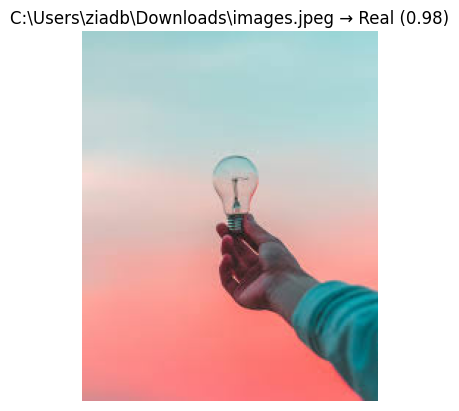

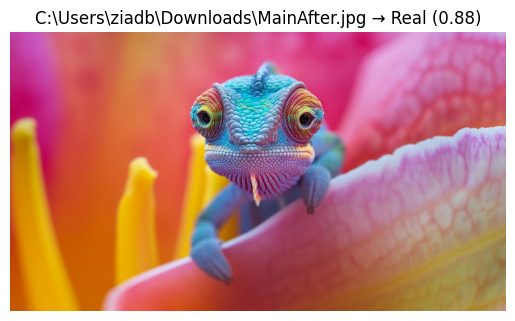

In [31]:
test_images = [
    r"Your_Image",
    r"Your_Image2"
]

for path in test_images:
    result = client.run_workflow(
        workspace_name=workspace,
        workflow_id=workflow_id,
        images={"image": path},
        use_cache=True
    )

    pred_dict = result[0]["predictions"]["predictions"][0]
    label = pred_dict["class"]
    conf = pred_dict["confidence"]

    img = Image.open(path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{path.split('/')[-1]} → {label} ({conf:.2f})")
    plt.show()

# Reflections

- The Roboflow ViT model performs inference quickly and with high accuracy.  
- Visualizations confirm predictions align with validation performance (~99%).  
- Next step: build a user-friendly **Streamlit app** for external testing.